<a href="https://colab.research.google.com/github/kvijay0611/CNN_Pytorch_Learn/blob/main/04_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Get Data

In [4]:
import requests
import zipfile
from pathlib import Path


In [5]:
!pip install kagglehub

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
! mkdir ~/.kaggle

In [8]:
cp /content/drive/MyDrive/kaggle.json ~/.kaggle/


In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 94% 140M/149M [00:01<00:00, 134MB/s]
100% 149M/149M [00:01<00:00, 120MB/s]


In [11]:
!unzip brain-tumor-mri-dataset.zip -d Brain_tumor

Streaming output truncated to the last 5000 lines.
  inflating: Brain_tumor/Training/glioma/Tr-gl_0712.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0713.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0714.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0715.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0716.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0717.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0718.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0719.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0720.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0721.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0722.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0723.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0724.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0725.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0726.jpg  
  inflating: Brain_tumor/Training/glioma/Tr-gl_0727.jpg  
  inflating: Brain_tu

# Data Preparation

In [12]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [13]:
walk_through_dir("Brain_tumor")

There are 2 directories and 0 images in 'Brain_tumor'.
There are 4 directories and 0 images in 'Brain_tumor/Training'.
There are 0 directories and 1339 images in 'Brain_tumor/Training/meningioma'.
There are 0 directories and 1595 images in 'Brain_tumor/Training/notumor'.
There are 0 directories and 1321 images in 'Brain_tumor/Training/glioma'.
There are 0 directories and 1457 images in 'Brain_tumor/Training/pituitary'.
There are 4 directories and 0 images in 'Brain_tumor/Testing'.
There are 0 directories and 306 images in 'Brain_tumor/Testing/meningioma'.
There are 0 directories and 405 images in 'Brain_tumor/Testing/notumor'.
There are 0 directories and 300 images in 'Brain_tumor/Testing/glioma'.
There are 0 directories and 300 images in 'Brain_tumor/Testing/pituitary'.


In [14]:
train_dir = "/content/Brain_tumor/Training"
test_dir = "/content/Brain_tumor/Testing"

train_dir, test_dir

('/content/Brain_tumor/Training', '/content/Brain_tumor/Testing')

In [15]:
import os
print(os.getcwd()) # print the current working directory
print(os.listdir()) # print the contents of the current working directory
print(os.path.exists(train_dir)) # check if the train_dir exists

/content
['.config', 'brain-tumor-mri-dataset.zip', 'drive', 'Brain_tumor', 'sample_data']
True


Visualizing the Image

In [16]:
#/content/Brain_tumor

Random image path: /content/Brain_tumor/Training/notumor/Tr-no_0788.jpg
Image class: notumor
Image size: (150, 198)
Image height: 198
Image width: 150


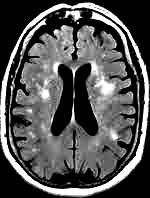

In [17]:
import random
from PIL import Image

#random.seed(42)
image_path = Path("/content/Brain_tumor")
image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 149.5, 197.5, -0.5)

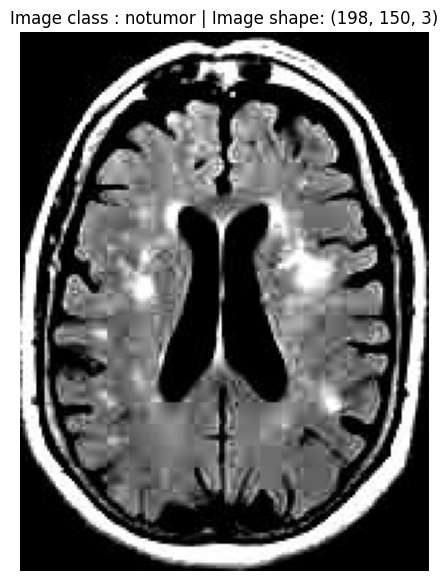

In [18]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

#ploting
plt.figure(figsize= (10,7))
plt.imshow(img_as_array)

plt.title(f"Image class : {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False)

## Converting them to Tensosrs

In [19]:
#Transformation of Data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [20]:
data_transform = transforms.Compose([

    transforms.Resize(size= (64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

In [21]:
data_transform(img).dtype

torch.float32

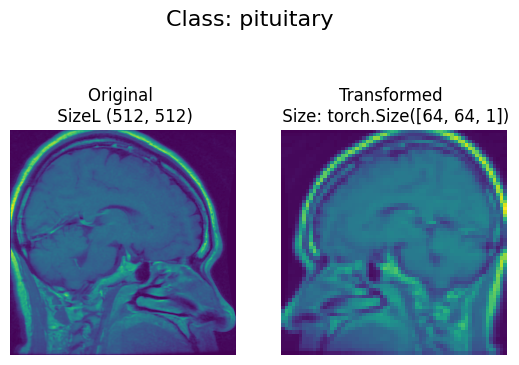

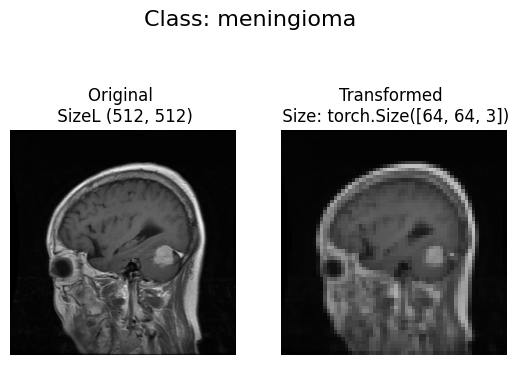

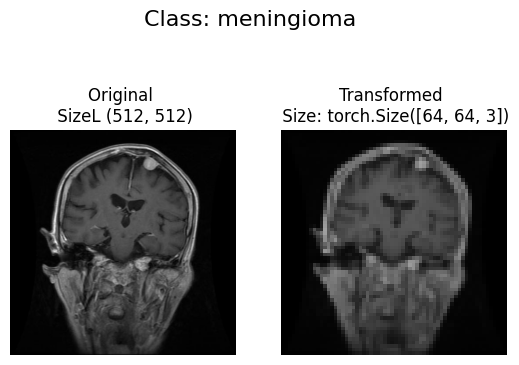

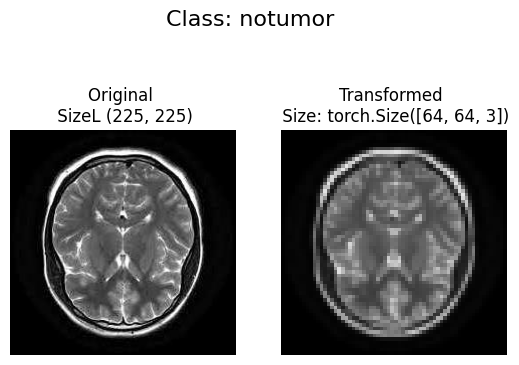

In [22]:
def plot_transformed_images(image_path: list, transform, n=4, seed=42):

  if seed:
    random.seed(seed)
    random_image_path = random.sample(image_path, k=n)
    for image_path in random_image_path:
      with Image.open(image_path) as f:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(f)
        ax[0].set_title(f"Original \n SizeL {f.size}")
        ax[0].axis("off")


        transformed_image = transform(f).permute(1, 2, 0)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed \n Size: {transformed_image.shape}")
        ax[1].axis("off")

        fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform = data_transform, n=4)





In [23]:
from torchvision import datasets
train_data = datasets.ImageFolder(root= train_dir, transform= data_transform,
                                  target_transform= None)

test_data = datasets.ImageFolder(root= test_dir, transform= data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 5712
     Root location: /content/Brain_tumor/Training
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 1311
     Root location: /content/Brain_tumor/Testing
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [24]:
test_dir , train_dir

('/content/Brain_tumor/Testing', '/content/Brain_tumor/Training')

In [25]:
class_names = train_data.classes
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [26]:
#Index on train data
img , label = train_data[0][0], train_data[0][1]
print(f"Image tensor :/n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"label datatype: {type(label)}")

Image tensor :/ntensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
Image shape: torch.Size([3, 64, 64])
Image datatype: torch.float32
Image label: 0
label datatype: <class 'int'>


Original shape: torch.Size([3, 64, 64])
Image permute shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'glioma')

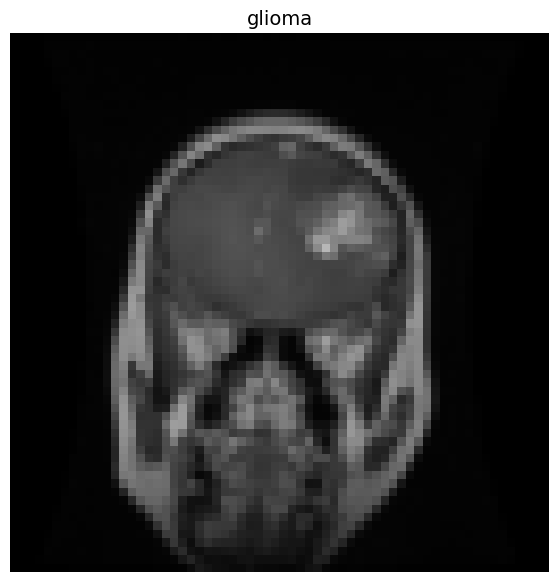

In [27]:
#Rearrange the dimensions
img_permute =img.permute(1, 2, 0)

print(f"Original shape: {img.shape}")
print(f"Image permute shape: {img_permute.shape}")

plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

Turn loaded images into Dataloaders

In [28]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset= train_data, batch_size= BATCH_SIZE,
                              num_workers = 1,
                              shuffle= True)
test_dataloader = DataLoader(dataset = test_data, batch_size= BATCH_SIZE,
                             num_workers= 1, shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x785455e7fd60>,
 <torch.utils.data.dataloader.DataLoader at 0x785455e7fd90>)

In [29]:
len(train_dataloader), len(test_dataloader)

(179, 41)

## Augumentation of Data

In [30]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size= (244, 244)),
    transforms.TrivialAugmentWide(num_magnitude_bins= 31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size= (244, 244)),
    transforms.ToTensor()
])

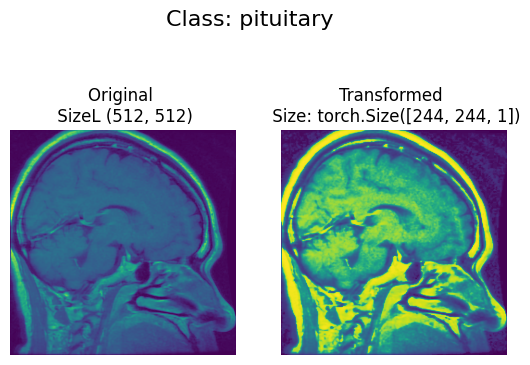

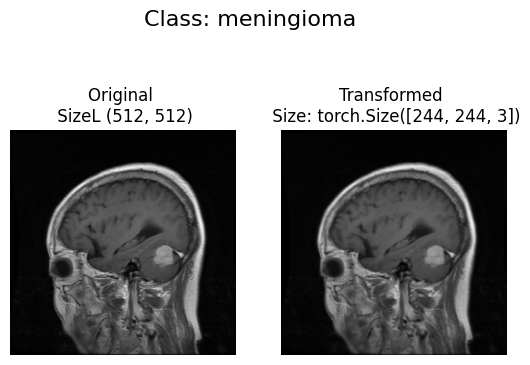

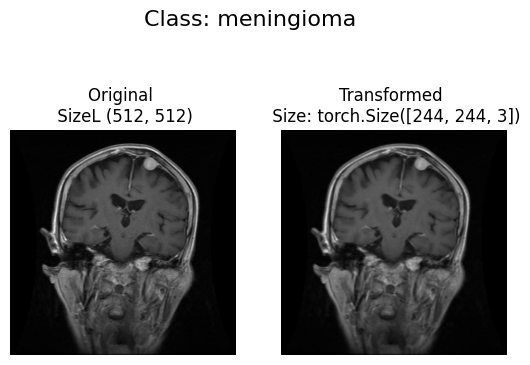

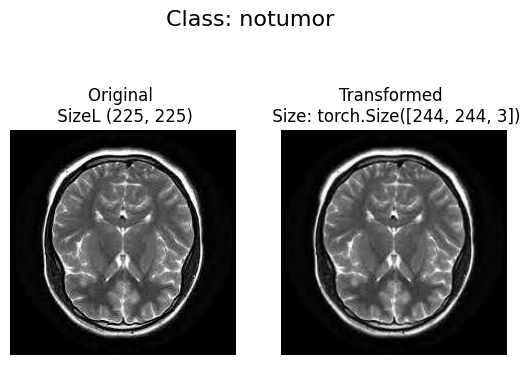

In [31]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

plot_transformed_images(image_path= image_path_list, transform= train_transform,
                        n = 4, seed= 42)

# Model 0: Tiny VGG without data augmentation

In [32]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int,
              hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size= 3, stride= 1, padding= 0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels= hidden_units,
                  kernel_size= 3, stride= 1, padding= 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride= 2, )

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size= 3,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size= 3,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*13*13,
                  out_features= output_shape)

    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x =self.classifier(x)
    print(x.shape)
    return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape= 3,
                  hidden_units = 10,
                  output_shape= len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=4, bias=True)
  )
)

Testing model by  doing forward pass w single img

In [33]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [35]:
#forward pass
model_0(image_batch.to(device))

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])


tensor([[-0.0041,  0.0207,  0.0443, -0.0141],
        [-0.0044,  0.0223,  0.0435, -0.0145],
        [-0.0066,  0.0242,  0.0434, -0.0145],
        [-0.0051,  0.0214,  0.0449, -0.0156],
        [-0.0053,  0.0218,  0.0429, -0.0154],
        [-0.0057,  0.0232,  0.0446, -0.0142],
        [-0.0032,  0.0216,  0.0447, -0.0137],
        [-0.0059,  0.0216,  0.0453, -0.0151],
        [-0.0030,  0.0219,  0.0449, -0.0144],
        [-0.0047,  0.0216,  0.0433, -0.0149],
        [-0.0052,  0.0223,  0.0450, -0.0156],
        [-0.0042,  0.0222,  0.0438, -0.0145],
        [-0.0046,  0.0215,  0.0406, -0.0147],
        [-0.0054,  0.0238,  0.0435, -0.0156],
        [-0.0055,  0.0245,  0.0437, -0.0142],
        [-0.0053,  0.0231,  0.0443, -0.0153],
        [-0.0059,  0.0216,  0.0448, -0.0133],
        [-0.0056,  0.0221,  0.0455, -0.0148],
        [-0.0051,  0.0225,  0.0441, -0.0151],
        [-0.0052,  0.0230,  0.0439, -0.0144],
        [-0.0056,  0.0215,  0.0441, -0.0152],
        [-0.0028,  0.0218,  0.0443

to get idea of the shapes going through our model

In [36]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size= [1, 3, 64, 64])

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 4])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 4]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [37]:
#Train
def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [38]:
#Test
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

# Combine Train and Test

In [71]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | "f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}" )



        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

# Test and Evaluate Model 0

In [72]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [98]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
start_time = timer()

# Set number of epochs
NUM_EPOCHS = 24

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)




# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
total_train_time_model_0= print_train_time(start=start_time, end=end_time, device=device)


  0%|          | 0/24 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([3

In [99]:
model_0_results

{'train_loss': [0.19598080761023073],
 'train_acc': [0.9336592178770949],
 'test_loss': [0.3334624310955405],
 'test_acc': [0.8902439024390244]}

Making Confusion matrix

In [100]:
from tqdm.auto import tqdm

y_preds = []
model_0.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    X, y = X.to(device), y.to(device)

    y_logit = model_0(X)
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)


  0%|          | 0/41 [00:00<?, ?it/s]

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 4])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.

In [101]:
#to check on torchmetrics
try:
  import torchmetrics, mlxtend
  print(f"mlxtend verion: {mlxtend.__version__}")
  assert int (mlxtend.__version__.split(" . ")[1]) >= 19

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend vrsion: {mlxtend.__version__}")

mlxtend verion: 0.23.3
mlxtend vrsion: 0.23.3


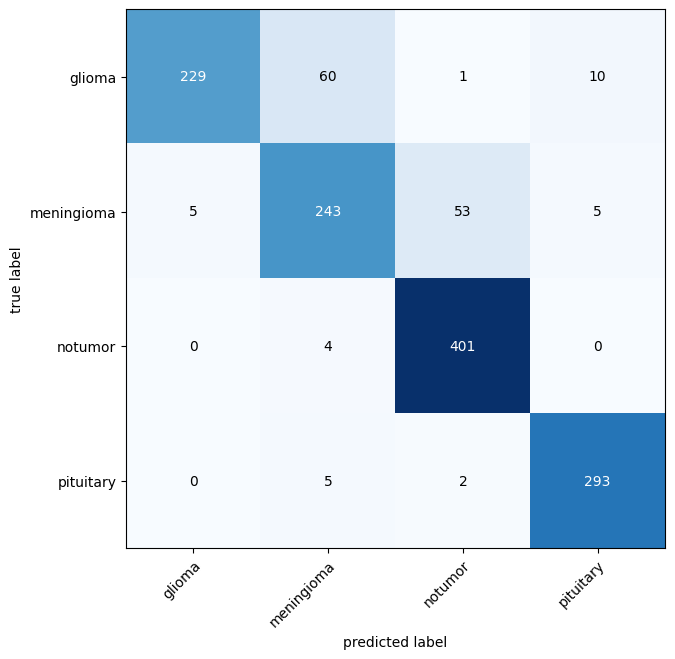

In [102]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes= len(class_names), task= 'multiclass').to(device)

# Convert test_data.targets to a tensor
target_tensor = torch.tensor(test_data.targets, device=device) # Convert targets to tensor and move to device

confmat_tensor = confmat(preds = y_pred_tensor.to(device), target = target_tensor) # Move predictions to device

fig, ax = plot_confusion_matrix(conf_mat= confmat_tensor.cpu().numpy(),
                                class_names= class_names, figsize=(7, 7))

Plot the Loss curves of Model 0

In [103]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [104]:
import matplotlib.pyplot as plt
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))
  #plot for loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label= "train_loss")
  plt.plot(epochs, test_loss, label= "test_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()


  #plot for accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label= "train_accuracy")
  plt.plot(epochs, test_accuracy, label= "test_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

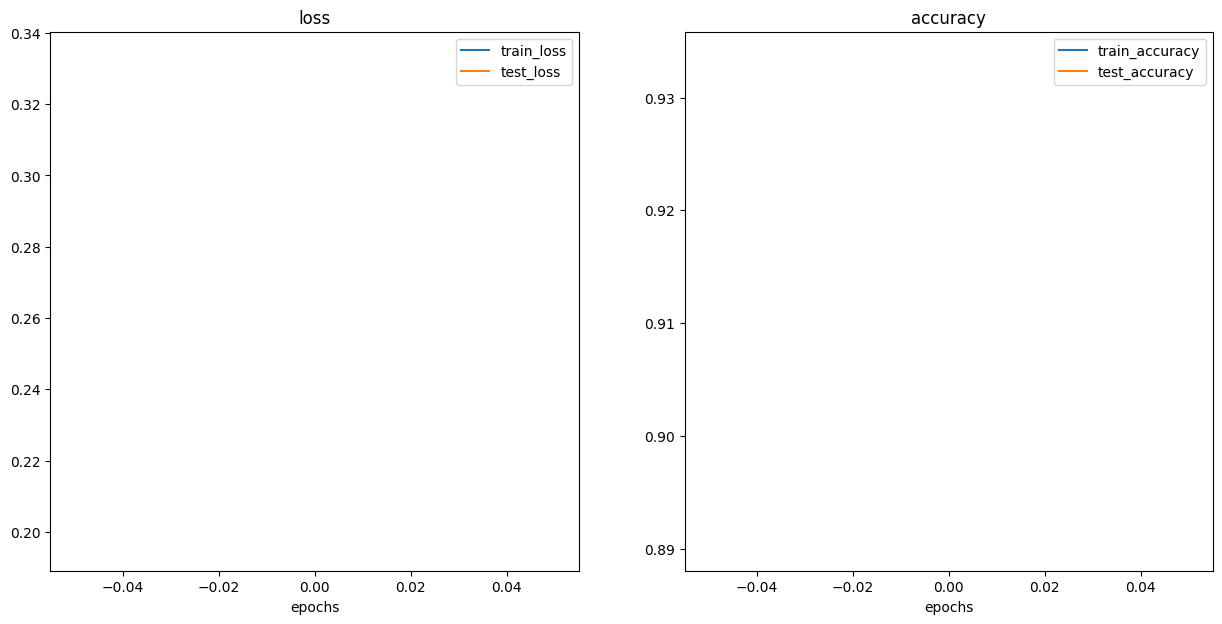

In [105]:
plot_loss_curves(model_0_results)